# **CS412 Machine Learning - Recitation 3**

## **1. Linear Regression**
The simplest form of the regression equation with one dependent (y) and one independent (x) variable is defined by the formula:

> $\hat{y} = wx + b$

It might be useful to answer the following questions:

1.   How well does a set of predictor variables work in predicting an outcome (dependent) variable?
2.   Which variables in particular are significant predictors of the outcome variable, and in which way?
3.   What will be the future value (or trend) of a serie?

### **Generating Linear Data**

We'll start with a simple dataset that roughly follows a line. The data points are distributed following a simple function where $y$ depends on $x$ linearly.

Also, in order to make it more realistic and also to be able to observe the effects of randomized data on our model, we'll add some random noise using `np.random.randn()`.

The underlying function we simulate is:

$$
y = 5x + 20 + \epsilon
$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [ ]:
# Initialize key evaluation matrices to compare different methods.
keys = ['Method', 'Coefficients', 'Bias', 'MSE', 'R2']
results = []

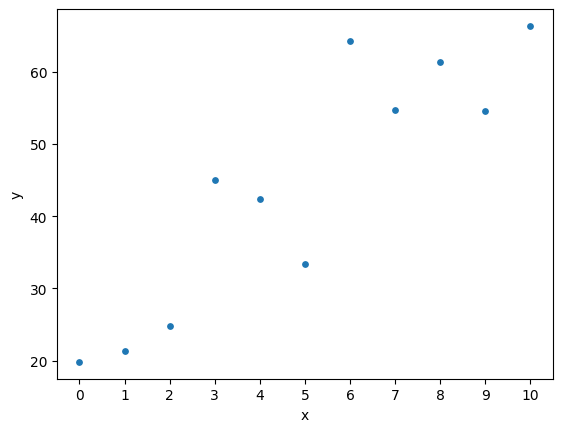

In [ ]:
sample_size = 11

x = np.linspace(0, sample_size-1, sample_size) # Returns an evenly spaced array of numbers.

slope = 5
bias = 20
noise_coef = 10  # Used to adjust the disturbance in the data points.

y = x * slope + bias + np.random.randn(sample_size)*noise_coef

plt.scatter(x,y, s=15)
plt.xlabel('x')
plt.ylabel('y')
sample_size < 20 and plt.xticks(range(sample_size))
plt.show()

### **1.1 Using Scikit-Learn for a Solution**

The easiest way to perform linear regression is to use `LinearRegression` from `scikit-learn`.

Under the hood, the model fits a **line** of the form:

$$
\hat{y} = w x + b
$$

where:
- $w$ → slope (weight)  
- $b$ → intercept (bias)

We’ll fit the model, predict values, and visualize the regression line.

 The **$R^2$ score** shows how well the model explains the data.  
An $R^2$ close to **1** means the model fits very well.

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the class and fit the data
linreg_model_1 = LinearRegression()
linreg_model_1.fit(x.reshape(-1,1), y)  # Notice the specific shape for input.

# Predict y values
w_estim = linreg_model_1.coef_
b_estim = linreg_model_1.intercept_
y_pred = w_estim * x + b_estim


In [ ]:
# Scikit-Learn models expect 2D feature matrices of shape.
x.shape         # (11,) -----> [0,1,2,...,11]
x.reshape(-1,1) # (11,1) ----> [[0],
                #               [1],
                #               [2],
                #                .
                #                .
                #               [11]]


array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]])

In [ ]:
# Import performance analysis metrics.
from sklearn.metrics import mean_squared_error, r2_score

# Print the performance metrics.
coef = linreg_model_1.coef_
interc = linreg_model_1.intercept_
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print('Coefficients: \n', coef)
print('Bias:', interc)
print("Mean squared error: %.2f" % mse)
print("R2: %.4f" % r2)

Coefficients: 
 [4.69387681]
Bias: 20.890415367925414
Mean squared error: 53.81
R2: 0.8037


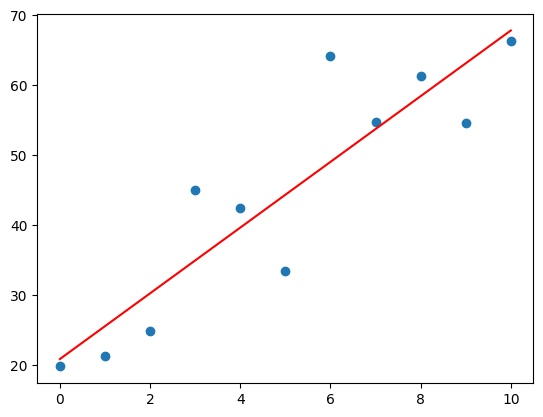

In [ ]:
# Plot the results
plt.scatter(x,y)
plt.plot(x, y_pred, c='red')
plt.show()

In [ ]:
# Record the results for comparison.

results.append({keys[0]: 'Scikit-Learn', keys[1]: coef[0], keys[2]: interc, keys[3]: mse, keys[4]: r2})


### **1.2 The Manually Calculated Pseudo-Inverse Solution**

We can use the power of Linear Algebra to find the proper weight and bias values as well.
As a recap, suppose that we're trying to find the best linear model for the dataset given as:

$$[(0,1),(2,5),(4,3)]$$

If we put these datapoints into the linear model:

$$
\begin{aligned}
(x,y) &\longrightarrow y = b + w \cdot x \\[1em]
(0,1) &\longrightarrow 1 = b + w \cdot 0 \\
(2,5) &\longrightarrow 5 = b + w \cdot 2 \\
(4,3) &\longrightarrow 3 = b + w \cdot 4
\end{aligned}
$$

Rewriting the system above using matrix notation

<div>
$$
\begin{bmatrix}
1 \\[4pt]
5 \\[4pt]
3
\end{bmatrix}
=
\begin{bmatrix}
b + w \cdot 0 \\[4pt]
b + w \cdot 2 \\[4pt]
b + w \cdot 4
\end{bmatrix}
\;\longrightarrow\;
\begin{bmatrix}
1 \\[4pt]
5 \\[4pt]
3
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 \\[4pt]
1 & 2 \\[4pt]
1 & 4
\end{bmatrix}
\begin{bmatrix}
b \\[4pt]
w
\end{bmatrix}
$$
</div>


If we call the vector of model parameters $\beta$, we can denote the matrix above as:

$$y=X\beta$$

and find the general formula as follows:

$$
\begin{aligned}
y &= X\beta \\
X^{T}y &= X^{T}X\beta \\
\beta &= (X^{T}X)^{-1}X^{T}y
\end{aligned}
$$


The **pseudoinverse** of the matrix $X$ is defined by $(X^{T}X)^{-1}X^{T}$, and numpy has built-in methods to help us obtain it easily.
From this result, it is apparent that model parameters can be obtained using the pseudoinverse of X matrix and y vector.

In [ ]:
# Form the X matrix with bias on first column and the data on the second column. (Arbitrary choice)
X = np.ones((sample_size, 2))
for i in range(sample_size):
  X[i][1] = x[i]

# Compute the pseudoinverse of matrix X
X_inv = np.linalg.pinv(X)

# Find the weights
beta = np.matmul(X_inv, y)

w_estim2 = beta[1]
b_estim2 = beta[0]

# Predict y values
y_pred2 = w_estim2 * x + b_estim2



In [ ]:
# Display and compare X-X_inv matrices
print(f"Shape of X matrix    : {X.shape}")
print(f"Shape of X_inv matrix: {X_inv.shape}")
print(X)
print(X_inv)


Shape of X matrix    : (11, 2)
Shape of X_inv matrix: (2, 11)
[[ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]]
[[ 3.18181818e-01  2.72727273e-01  2.27272727e-01  1.81818182e-01
   1.36363636e-01  9.09090909e-02  4.54545455e-02  1.39980242e-17
  -4.54545455e-02 -9.09090909e-02 -1.36363636e-01]
 [-4.54545455e-02 -3.63636364e-02 -2.72727273e-02 -1.81818182e-02
  -9.09090909e-03  4.72498094e-19  9.09090909e-03  1.81818182e-02
   2.72727273e-02  3.63636364e-02  4.54545455e-02]]


In [ ]:
# Print the performance metrics.
coef = w_estim2
interc = b_estim2
mse = mean_squared_error(y, y_pred2)
r2 = r2_score(y, y_pred2)
print('Coefficients: \n', coef)
print('Bias:', interc)
print("Mean squared error: %.2f" % mse)
print("R2: %.4f" % r2)

Coefficients: 
 4.69387680687763
Bias: 20.89041536792541
Mean squared error: 53.81
R2: 0.8037


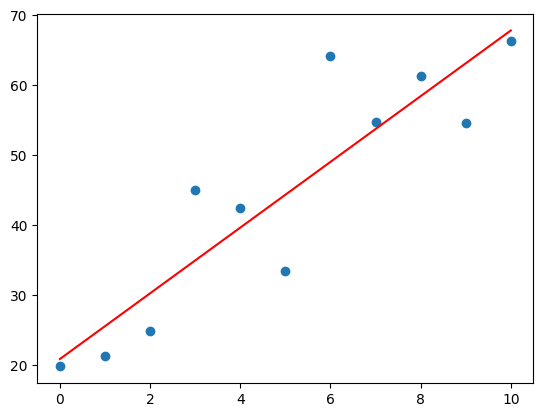

In [ ]:
# Plot the results
plt.scatter(x,y)
plt.plot(x, y_pred2, c='red')
plt.show()

In [ ]:
results.append({keys[0]: 'PseudoInverse', keys[1]: coef, keys[2]: interc, keys[3]: mse, keys[4]: r2})


### **1.3 Gradient Descent Solution**

The third approach is **Gradient Descent**, one of the core optimization algorithms in Machine Learning.

Instead of solving directly, we iteratively update $w$ and $b$ by moving in the direction that reduces the error.


We want to minimize the Mean Squared Error (MSE):


$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - (w x_i + b) \right)^2
$


The gradients are:
- For $w$ (slope):  
  $\frac{\partial \text{MSE}}{\partial w} = -\frac{2}{n} \sum_{i=1}^{n} x_i \cdot \left( y_i - (w x_i + b) \right)$
- For $b$ (intercept):  
  $\frac{\partial \text{MSE}}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} \left( y_i - (w x_i + b) \right)$


\
**Weight Update Formulas:**

We update the weights iteratively using the following update rules, where $\eta$ is the learning rate:

$
w \leftarrow w - \eta \cdot \frac{\partial \text{MSE}}{\partial w}
$

$
b \leftarrow b - \eta \cdot \frac{\partial \text{MSE}}{\partial b}
$

We initialize $w$ and $b$ and update them iteratively using a fixed learning rate.

Notice how we subtract the gradient term during each update step — this is because we want to move toward the minimum of the loss function, that is, in the opposite direction of the gradient, which points toward increasing loss.


If the learning rate is too high → the model may oscillate or diverge.  
If it’s too low → convergence will be slow. Try experimenting with `learning_rate` and `n_iterations`.


<details>
<summary><b> Reminder — Derivative Rule Used in Gradient Descent (click to expand)</b></summary>

<br>

When we compute the gradients of the Mean Squared Error (MSE),
we’re applying two fundamental calculus rules:

1. **Power Rule:**  
   If  
   $$
   f(x) = (g(x))^2
   $$  
   then  
   $$
   f'(x) = 2\,g(x)\,g'(x)
   $$

2. **Chain Rule:**  
   When one function is nested inside another,  
   $$
   \frac{d}{dx} \big( f(g(x)) \big) = f'(g(x)) \cdot g'(x)
   $$


In [ ]:
# Initialize parameters
w_gd = 0.0  # intercept
b_gd = 0.0  # slope

# Hyperparameters
learning_rate = 0.001
n_iterations = 100000

loss_history = []

for i in range(n_iterations):
    # Making predictions
    y_pred3 = w_gd * x + b_gd

    # Compute error
    error = y - y_pred3

    # Calculate gradients
    gradient_w = (-2/sample_size) * np.sum(x * error)
    gradient_b = (-2/sample_size) * np.sum(error)

    # Update parameters
    w_gd = w_gd - learning_rate * gradient_w
    b_gd = b_gd - learning_rate * gradient_b

    # Calculate and store current loss (MSE)
    loss = np.mean(error ** 2)
    loss_history.append(loss)



In [ ]:
# Print the performance metrics.
coef = w_gd
interc = b_gd
mse = mean_squared_error(y, y_pred3)
r2 = r2_score(y, y_pred3)
print('Coefficients: \n', coef)
print('Bias:', interc)
print("Mean squared error: %.2f" % mse)
print("R2: %.4f" % r2)

Coefficients: 
 4.693876806878094
Bias: 20.890415367922202
Mean squared error: 53.81
R2: 0.8037


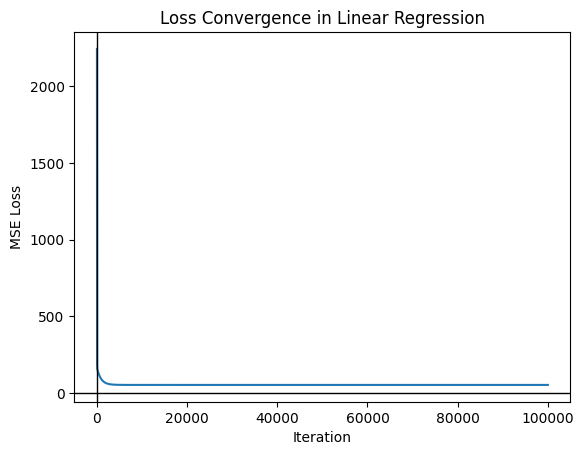

In [ ]:

# Plot the loss history
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Loss Convergence in Linear Regression")
plt.axhline(0, color='black', linewidth=1)  # y = 0 line (horizontal)
plt.axvline(0, color='black', linewidth=1)  # x = 0 line (vertical)

plt.show()

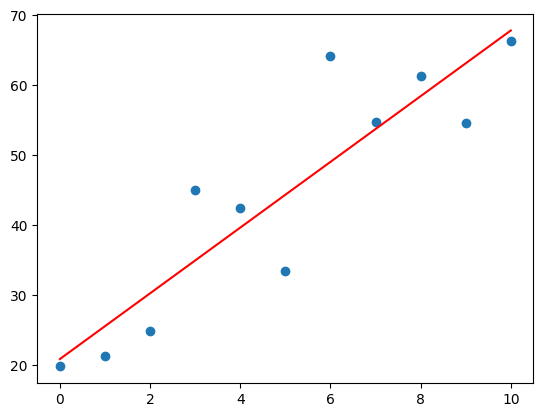

In [ ]:
# Plot the results
plt.scatter(x,y)
plt.plot(x, y_pred3, c='red')
plt.show()

In [ ]:
results.append({keys[0]: 'Gradient Descent', keys[1]: coef, keys[2]: interc, keys[3]: mse, keys[4]: r2})


### **Comparison of the 3 Methods**

In [ ]:
# Compare the 3 methods:
results_df = pd.DataFrame(results)
display(results_df.round(6))

,Method,Coefficients,Bias,MSE,R2
0,Scikit-Learn,4.693877,20.890415,53.809846,0.80371
1,PseudoInverse,4.693877,20.890415,53.809846,0.80371
2,Gradient Descent,4.693877,20.890415,53.809846,0.80371


## **2. Polynomial Regression**

If the relationship between $x$ and $y$ is nonlinear, we add polynomial terms:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \dots + \beta_p x^p
$$

Compact forms:

$$
y = \sum_{j=0}^{p} \beta_j x^{\,j}
\qquad\qquad
\mathbf{y} = X \boldsymbol{\beta}
$$

In short, higher degree $\Rightarrow$ more flexibility, but also higher risk of overfitting.

Although the relationship between $x$ and $y$ is nonlinear,  
the model is still linear with respect to its parameters $(\beta_0, \beta_1, \beta_2, \ldots, \beta_d$).  

That means it can still be solved using the ordinary least squares (OLS) method — exactly what `LinearRegression` does.


We simply transform the original input \(x\) into multiple polynomial features:

$$
x \;\rightarrow\; [1, x, x^2, x^3, \ldots, x^d]
$$



### **Generate a Higher Degree Dataset**

Let's create a **nonlinear (quadratic)** dataset that follows the function:

$$
y = x^2 + 2x + 10 + \epsilon
$$

This dataset will allow us to test how well our linear and polynomial regression models capture **nonlinear relationships** between \(x\) and \(y\).


In [ ]:
results2 = []

sample_size2 = 21
noise_coef2 = 20

x_2nddeg = np.linspace(0, sample_size2-1, sample_size2)-(sample_size2/3)
y_2nddeg = x_2nddeg*x_2nddeg + 2*x_2nddeg + 10 + np.random.randn(sample_size2)*noise_coef2

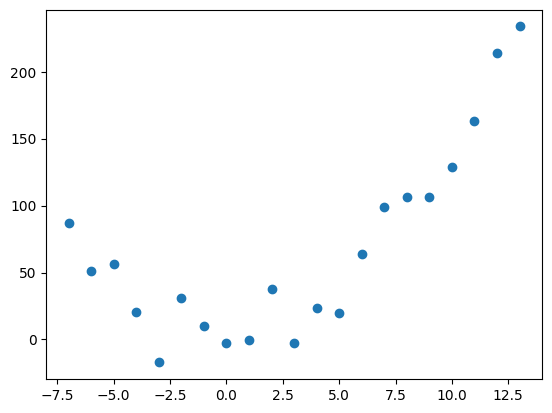

In [ ]:
plt.scatter(x_2nddeg, y_2nddeg)

### **2.1 Using Scikit-Learn for a Solution**

#### **2.1.1 Linear Fit**

Let's see how the linear model performs when applied on a higher degree system to see where it falls short.

In [ ]:
# Initialize the class and fit the data
linreg_model_2 = LinearRegression()
linreg_model_2.fit(x_2nddeg.reshape(-1,1), y_2nddeg)

# Predict y values
w_estim4 = linreg_model_2.coef_
b_estim4 = linreg_model_2.intercept_
y_pred4 = w_estim4 * x_2nddeg + b_estim4

In [ ]:
# Print the performance metrics.
coef = w_estim4
interc = b_estim4
mse = mean_squared_error(y_2nddeg, y_pred4)
r2 = r2_score(y_2nddeg, y_pred4)
print('Coefficients: \n', coef)
print('Bias:', interc)
print("Mean squared error: %.2f" % mse)
print("R2: %.4f"% r2)


Coefficients: 
 [8.10937105]
Bias: 43.71614139147738
Mean squared error: 2376.46
R2: 0.5036


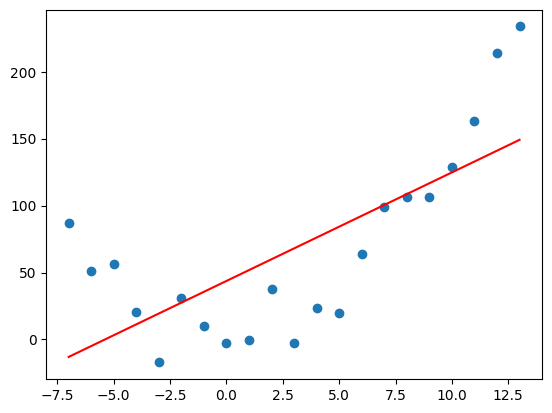

In [ ]:
# Plot the fit

plt.scatter(x_2nddeg, y_2nddeg)
plt.plot(x_2nddeg, y_pred4, c='red')

In [ ]:
results2.append({keys[0]: 'SciKit Linear Fit', keys[1]: coef[0], keys[2]: interc, keys[3]: mse, keys[4]: r2})

#### **2.1.2 Polynomial Fit**

##### **2.1.2.1 2nd Degree Polynomial**
The performance of the linear model is limited because it assumes a strictly linear relationship between the features and the target variable. However, the dataset exhibits nonlinear patterns, making the model systematically biased. Increasing model complexity, for instance through polynomial regression, allows the model to better approximate the underlying data structure.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_reg.fit_transform(x_2nddeg.reshape(-1, 1))


In [ ]:
# Compare x_2nddeg and X_poly
print(f"Shape of x Vector    : {x_2nddeg.shape}")
print(f"Shape of polynomial X: {X_poly.shape}")
print(x_2nddeg)
print(X_poly)

Shape of x Vector    : (21,)
Shape of polynomial X: (21, 2)
[-7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
 11. 12. 13.]
[[ -7.  49.]
 [ -6.  36.]
 [ -5.  25.]
 [ -4.  16.]
 [ -3.   9.]
 [ -2.   4.]
 [ -1.   1.]
 [  0.   0.]
 [  1.   1.]
 [  2.   4.]
 [  3.   9.]
 [  4.  16.]
 [  5.  25.]
 [  6.  36.]
 [  7.  49.]
 [  8.  64.]
 [  9.  81.]
 [ 10. 100.]
 [ 11. 121.]
 [ 12. 144.]
 [ 13. 169.]]


In [ ]:
linreg_model_3 = LinearRegression()
linreg_model_3.fit(X_poly, y_2nddeg.reshape(-1,1))

# Predict y values
coef = linreg_model_3.coef_
interc = linreg_model_3.intercept_
y_pred5 = interc*X_poly[:,0] + coef[0,1]*X_poly[:,1] + coef[0,2]*X_poly[:,2]
#   y   =  b_0  *   1        +     * b_1    x        +     b_2  *  x^2

IndexError: index 2 is out of bounds for axis 1 with size 2

In [ ]:
coef

array([[-0.35867153,  1.41134043]])

In [ ]:
# Print the performance metrics.

coef = coef[0][:0:-1]
interc = interc
mse = mean_squared_error(y_2nddeg, y_pred5)
r2 = r2_score(y_2nddeg, y_pred5)
print('Coefficients: \n', coef)
print('Bias:', interc)
print("Mean squared error: %.2f" % mse)
print("R2: %.4f"% r2)


Coefficients: 
 [1.41134043]
Bias: [4.66905617]
Mean squared error: 519.74
R2: 0.8914


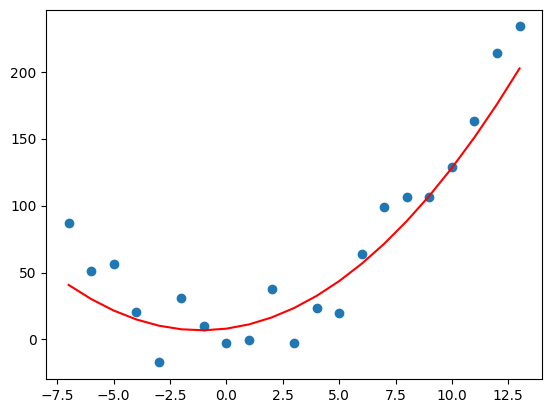

In [ ]:
plt.scatter(x_2nddeg, y_2nddeg)
plt.plot(x_2nddeg, y_pred5, c='red')

In [ ]:
results2.append({keys[0]: 'SciKit Poly Fit 2nd Deg.', keys[1]: coef[0:2], keys[2]: interc[0], keys[3]: mse, keys[4]: r2})

##### **2.1.2.2 10th Degree Polynomial**

Higher-degree polynomials introduce far more flexibility into the model. This allows the curve to pass extremely close to every training point, potentially fitting even the smallest fluctuations in the data. While this might seem desirable at first, it often leads to overfitting, where the model learns not only the underlying trend but also the noise present in the data.


In [ ]:
# 10th degree case
poly_reg = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_reg.fit_transform(x_2nddeg.reshape(-1,1))

# Initialize the model.
linreg_model_4 = LinearRegression()

# Fit the data.
linreg_model_4.fit(X_poly, y_2nddeg.reshape(-1,1))

# Predict y values.
y_pred6 = linreg_model_4.predict(X_poly)


In [ ]:
# Find the weights and evaluation metrics.
coef = linreg_model_4.coef_[0][::-1]
interc = linreg_model_4.intercept_
mse = mean_squared_error(y_2nddeg, y_pred6)
r2 = r2_score(y_2nddeg, y_pred6)
print('Coefficients: \n', coef)
print('Bias:', interc)
print("Mean squared error: %.2f" % mse)
print("R2: %.4f"% r2)



Coefficients: 
 [ 1.30204838e-07 -6.15636256e-06  7.14713066e-05  3.58962890e-04
 -9.00755772e-03  4.20200000e-03  3.51950346e-01 -4.08002670e-01
 -3.26584591e+00  3.34592027e+00]
Bias: [13.47472992]
Mean squared error: 161.42
R2: 0.9663


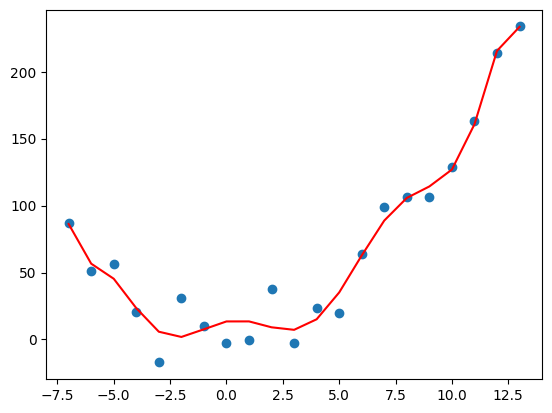

In [ ]:
# Plot the results to see how 10th degree polynomial fits the data.
plt.scatter(x_2nddeg, y_2nddeg)
plt.plot(x_2nddeg, y_pred6, c='red')


In [ ]:
results2.append({keys[0]: 'SciKit Poly Fit 10th Deg.', keys[1]: coef, keys[2]: interc[0], keys[3]: mse, keys[4]: r2})

### **2.2 The Manually Calculated Pseudo-Inverse Solution**

The pseudoinverse approach remains valid for higher-degree polynomial regression. However, the expanded feature matrix includes multiple powers of
x, so it’s important to keep track of the coefficient order and ensure the bias term (intercept) is handled correctly in the $\beta$ vector.

In [ ]:
# Form the X matrix
X2 = np.ones((sample_size2, 3))
for i in range(sample_size2):
  X2[i][2] = x_2nddeg[i]*x_2nddeg[i]
  X2[i][1] = x_2nddeg[i]

# Take the pseudoinverse
X2_inv = np.linalg.pinv(X2)

# Multiply the pseudoinverse with the output to find the beta vector.
beta2 = np.matmul(X2_inv, y_2nddeg)

# Make predictions.
y_pred7 = beta2[2] * x_2nddeg*x_2nddeg + beta2[1] * x_2nddeg + beta2[0]

In [ ]:
# Print the performance metrics.
coef = beta2[2:0:-1]
interc = beta2[0]
mse = mean_squared_error(y_2nddeg, y_pred7)
r2 = r2_score(y_2nddeg, y_pred7)
print('Coefficients: \n', coef)
print('Bias:', interc)
print("Mean squared error: %.2f" % mse)
print("R2: %.4f"% r2)



Coefficients: 
 [ 1.41134043 -0.35867153]
Bias: 4.6690561696411
Mean squared error: 248.69
R2: 0.9481


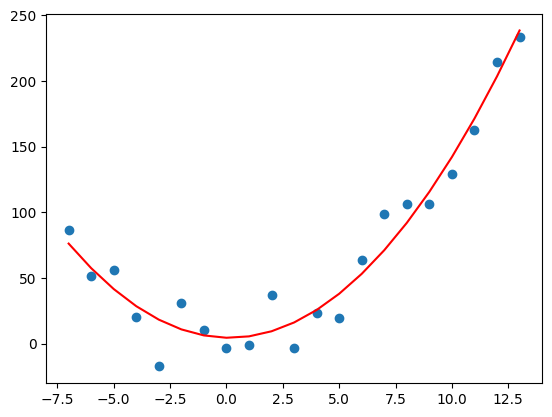

In [ ]:
plt.scatter(x_2nddeg, y_2nddeg)
plt.plot(x_2nddeg, y_pred7, c='red')

In [ ]:
results2.append({keys[0]: 'Pseudoinverse', keys[1]: coef, keys[2]: interc, keys[3]: mse, keys[4]: r2})

### **2.3 Gradient Descent Solution**

We model the 2nd-degree polynomial regression as:

$$
\hat{y}_i = w_2 x_i^2 + w_1 x_i + b
$$

We minimize the Mean Squared Error (MSE):

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - (w_2 x_i^2 + w_1 x_i + b) \right)^2
$$

Gradients:

$$
\frac{\partial \text{MSE}}{\partial w_2} = -\frac{2}{n} \sum_{i=1}^{n} x_i^2 \cdot \left( y_i - (w_2 x_i^2 + w_1 x_i + b) \right)
$$

$$
\frac{\partial \text{MSE}}{\partial w_1} = -\frac{2}{n} \sum_{i=1}^{n} x_i \cdot \left( y_i - (w_2 x_i^2 + w_1 x_i + b) \right)
$$

$$
\frac{\partial \text{MSE}}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} \left( y_i - (w_2 x_i^2 + w_1 x_i + b) \right)
$$

Weight update rules (using learning rate $\eta$):

$$
w_2 \leftarrow w_2 - \eta \cdot \frac{\partial \text{MSE}}{\partial w_2}
$$

$$
w_1 \leftarrow w_1 - \eta \cdot \frac{\partial \text{MSE}}{\partial w_1}
$$

$$
b \leftarrow b - \eta \cdot \frac{\partial \text{MSE}}{\partial b}
$$


In [ ]:
# Initialize parameters
w2_gd = 0.0
w1_gd = 0.0
b_gd = 0.0

# Hyperparameters
learning_rate2 = 0.0001
n_iterations2 = 100000

loss_history2 = []

for i in range(n_iterations2):
    # Making predictions
    y_pred8 = w2_gd*x_2nddeg*x_2nddeg + w1_gd*x_2nddeg + b_gd

    # Compute error
    error = y_2nddeg - y_pred8

    # Calculate gradients
    gradient_w2 = (-2/sample_size2) * np.sum(x_2nddeg*x_2nddeg * error)
    gradient_w1 = (-2/sample_size2) * np.sum(x_2nddeg * error)
    gradient_b  = (-2/sample_size2) * np.sum(error)

    # Update parameters
    w2_gd = w2_gd - learning_rate2 * gradient_w2
    w1_gd = w1_gd - learning_rate2 * gradient_w1
    b_gd = b_gd - learning_rate2 * gradient_b

    # Calculate and store current loss (MSE)
    loss = np.mean(error ** 2)
    loss_history2.append(loss)



In [ ]:
# Print the performance metrics.
coef = [float(w2_gd), float(w1_gd)]
interc = b_gd
mse = mean_squared_error(y_2nddeg, y_pred8)
r2 = r2_score(y_2nddeg, y_pred8)
print('Coefficients: \n', coef)
print('Bias:', interc)
print("Mean squared error: %.2f" % mse)
print("R2: %.4f" % r2)

Coefficients: 
 [1.4113427691514628, -0.3586783349566385]
Bias: 4.668880219013091
Mean squared error: 248.69
R2: 0.9481


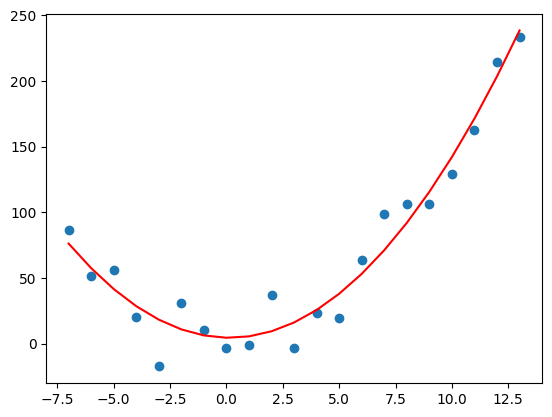

In [ ]:
plt.scatter(x_2nddeg, y_2nddeg)
plt.plot(x_2nddeg, y_pred8, c='red')

In [ ]:
results2.append({keys[0]: 'Gradient Descent', keys[1]: coef, keys[2]: interc, keys[3]: mse, keys[4]: r2})

In [ ]:
# Compare the methods:
results2_df = pd.DataFrame(results2)
display(results2_df.round(4))

,Method,Coefficients,Bias,MSE,R2
0,SciKit Linear Fit,8.109371,43.7161,2376.4623,0.5036
1,SciKit Poly Fit 2nd Deg.,[1.4113404297049257],4.6691,519.7429,0.8914
2,SciKit Poly Fit 10th Deg.,"[1.3020483757841816e-07, -6.156362562959039e-0...",13.4747,161.4154,0.9663
3,Pseudoinverse,"[1.4113404297049261, -0.3586715292566992]",4.6691,248.6899,0.9481
4,Gradient Descent,"[1.4113427691514628, -0.3586783349566385]",4.6689,248.6899,0.9481


## **3. Regularization**

### **Lasso & Ridge Regression**



Without regularization, a model can assign very large coefficients to some features in order to fit every data point perfectly, even the noisy ones.  
This leads to overfitting, where the model performs well on training data but fails to generalize to unseen data.

Large coefficients make the model extremely sensitive to small changes in the input:
A tiny fluctuation in `x` can cause a large swing in the prediction `ŷ`.

To reduce model complexity, we **penalize large weights** in the regression formula.  
This discourages the model from relying too heavily on any single feature.

---

### Ridge Regression (L2 Regularization)

We add the sum of squared coefficients to the loss function:

$$
\text{Loss}_{Ridge} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} w_j^2
$$
The L2 regularizer shrinks all coefficients smoothly toward zero, making the model simpler and more stable.
Think of it as adding stiffness to the model. It can still bend to fit data, but not too sharply.


---

### Lasso Regression (L1 Regularization)

Here, we penalize the absolute values of the coefficients instead of their squares:

$$
\text{Loss}_{Lasso} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |w_j|
$$
The L1 regularizer tends to push some coefficients exactly to zero, effectively performing feature selection —  
the model automatically chooses which inputs matter and ignores the rest.


---

### Elastic Net — a Balance of Both

Elastic Net combines both L1 and L2 penalties:

$$
\text{Loss}_{ElasticNet} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + \lambda_1 \sum_{j=1}^{p} |w_j| + \lambda_2 \sum_{j=1}^{p} w_j^2
$$

---

### Regularization Strength (λ)

The regularization parameter $\lambda$ controls the trade-off between bias and variance:

| λ value | Effect | Behavior |
|----------|---------|-----------|
| 0 | No penalty | Possible overfitting |
| Moderate | Balanced | Good generalization |
| Very large | Heavy penalty | Underfitting (too simple) |

The goal of regularization is to find that sweet spot, which is a model that captures the main trend without memorizing the noise.

In [ ]:
X_raw = x_2nddeg.reshape(-1,1)
degree = 10

In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Check whether the regularized model has successfully converged.
Keep in mind that both the polynomial degree and the regularization strength ($\lambda$) strongly affect convergence.
When features are on very different scales, the optimization process may become unstable and fail to converge, this is why standardization is often essential before applying regularization methods like Ridge or Lasso.

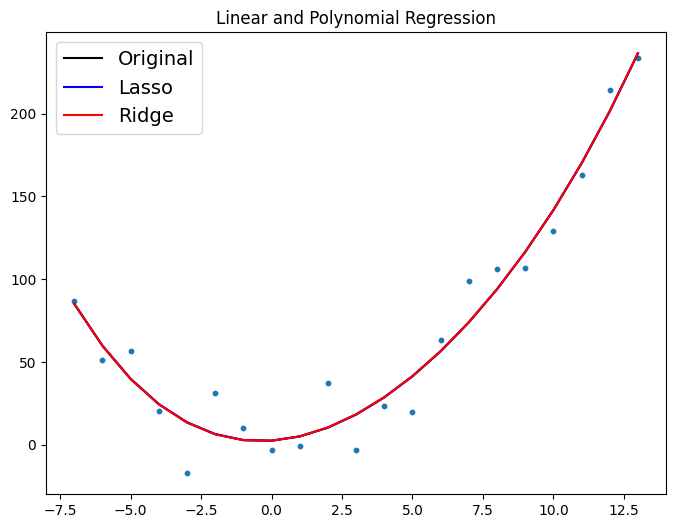

In [ ]:

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x_2nddeg.reshape(-1,1))

original = LinearRegression()
original.fit(X_poly, y_2nddeg.reshape(-1,1))

lasso = Lasso(alpha=0.2)
lasso.fit(X_poly, y_2nddeg)

ridge = Ridge(alpha=0.2)
ridge.fit(X_poly, y_2nddeg)

y_pred_original = original.predict(X_poly)
y_pred_lasso1 = lasso.predict(X_poly)
y_pred_ridge1 = ridge.predict(X_poly)

plt.figure(figsize=(8,6))
plt.scatter(x_2nddeg, y_2nddeg, s=10)
plt.plot(x_2nddeg, y_pred_original, color = 'black', label='Original')
plt.plot(x_2nddeg, y_pred_lasso1, color = 'blue', label='Lasso')
plt.plot(x_2nddeg, y_pred_ridge1, color = 'red', label='Ridge')
plt.title('Linear and Polynomial Regression')
plt.legend(fontsize=14)
plt.show()

As we can see, increasing the polynomial degree can lead to convergence issues when the data is not properly standardized.
To address this, we’ll now implement a standardization pipeline that ensures all features are on a comparable scale, allowing the regularized model to converge reliably.

In [ ]:
degree = 10

# High Degree Poly (no regularization)
ols_pipe = make_pipeline(
    StandardScaler(with_mean=True),
    PolynomialFeatures(degree=degree, include_bias=False),
    LinearRegression()
)
ols_pipe.fit(X_raw, y_2nddeg)
y_pred_ols = ols_pipe.predict(X_raw)

# Lasso
lasso_pipe = make_pipeline(
    StandardScaler(with_mean=True),
    PolynomialFeatures(degree=degree, include_bias=False),
    StandardScaler(with_mean=False),
    Lasso(alpha=0.1)
)
lasso_pipe.fit(X_raw, y_2nddeg)
y_pred_lasso = lasso_pipe.predict(X_raw)

# Ridge
ridge_pipe = make_pipeline(
    StandardScaler(with_mean=True),
    PolynomialFeatures(degree=degree, include_bias=False),
    StandardScaler(with_mean=False),
    Ridge(alpha=1.0)
)
ridge_pipe.fit(X_raw, y_2nddeg)
y_pred_ridge = ridge_pipe.predict(X_raw)


# We apply two scaling steps because the first ensures that the raw
# input features start on the same scale, and the second rescales
# the polynomially expanded features (which differ drastically in magnitude).
# This guarantees that regularization penalizes each coefficient proportionally and convergence remains stable.

# Without the first scaler, polynomial expansion explodes.
# Without the second scaler, Lasso and Ridge penalize features unequally and may not converge properly


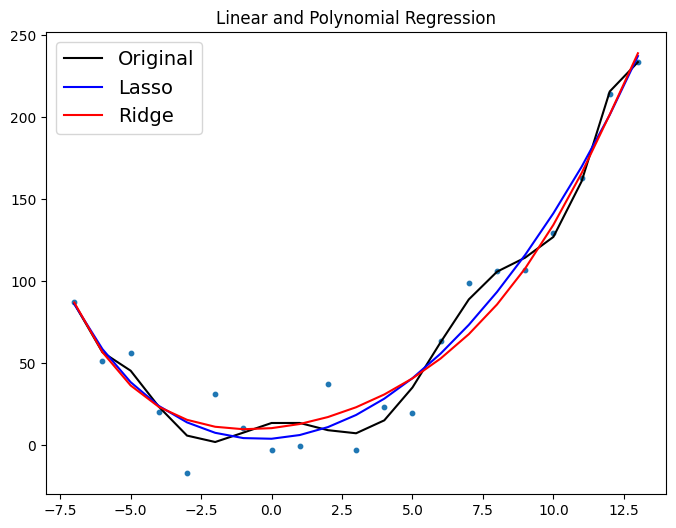

In [ ]:
# Visualising the Linear Regression results
plt.figure(figsize=(8,6))
plt.scatter(x_2nddeg, y_2nddeg, s=10)
plt.plot(x_2nddeg, y_pred_ols, color = 'black', label='Original')
plt.plot(x_2nddeg, y_pred_lasso, color = 'blue', label='Lasso')
plt.plot(x_2nddeg, y_pred_ridge, color = 'red', label='Ridge')
plt.title('Linear and Polynomial Regression')

plt.legend(fontsize=14)
plt.show()

## **Implementation on a Real World Problem**

**Real-World Application: Predicting King County House Prices**

To conclude our study, we’ll apply what we’ve learned to a real-world dataset:  
**King County House Prices**, which contains detailed information about home sales in the Seattle area.

Before we begin, let’s recall the mathematical formulations of Ridge and Lasso regularization once more:

<table>
<tr>
<td>

$$
\text{Loss}_{\text{Ridge}} =
\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
+ \lambda \sum_{j=1}^{p} w_j^2
$$

</td>

<td>

$$
\text{Loss}_{\text{Lasso}} =
\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
+ \lambda \sum_{j=1}^{p} |w_j|
$$

</td>
</tr>
</table>

The ridge regularization includes the square of the coefficients, producing a smooth and differentiable penalty that facilitates efficient optimization.  
In contrast, lasso regularization introduces an absolute value term, which makes the objective function non-differentiable at zero. This characteristic prevents a closed-form analytical solution.

As a result, scikit-learn implements lasso using a *coordinate descent* algorithm, which is an iterative, feature-by-feature optimization process that can be computationally expensive for large or high-degree models.  
Therefore, in this section, we’ll focus on Ridge Regression for hyperparameter tuning to achieve more stable and time-efficient results.


### Load the Data

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

In [ ]:
df = pd.read_csv('https://github.com/llSourcell/math_of_machine_learning/raw/master/kc_house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
y = df['price']
X = df.drop(columns=['price', 'id', 'date', 'yr_renovated', 'zipcode', 'lat', 'long'])

In [ ]:
X.shape

(21613, 14)

In [ ]:
y

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [ ]:
from sklearn.model_selection import train_test_split

# Split the validation set:
(X, X_test, y, y_test) = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training and test sets:
(X_train, X_val, y_train, y_val) = train_test_split(X, y, test_size=0.25, random_state=42)

print('Training set shape: ', X_train.shape)
print('Validation set shape: ', X_val.shape)
print('Test set shape: ', X_test.shape)

Training set shape:  (12967, 14)
Validation set shape:  (4323, 14)
Test set shape:  (4323, 14)


In [ ]:
from tqdm import tqdm

polynomial_degrees = [1, 2, 3, 4]
alpha_values = [100, 10, 1, 0.1]
log = []

# Precompute polynomial features for enhanced performance.
poly_cache = {}
for degree in polynomial_degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_cache[degree] = {
        "train": poly.fit_transform(X_train),
        "val": poly.transform(X_val)
    }


In [ ]:

for alpha in tqdm(alpha_values):
    ridge = Ridge(alpha=alpha, random_state=0) # Only the ridge regression since lasso can take a long time to converge.

    for degree in polynomial_degrees:
        X_poly_train = poly_cache[degree]["train"]
        X_poly_val = poly_cache[degree]["val"]

        scaler = StandardScaler(with_mean=False)
        X_poly_train_scaled = scaler.fit_transform(X_poly_train)
        X_poly_val_scaled = scaler.transform(X_poly_val)

        ridge.fit(X_poly_train_scaled, y_train)

        y_pred_val_ridge = ridge.predict(X_poly_val_scaled)

        log.append({
            'degree': degree, 'lambda': alpha,
            'rmse(ridge)': np.sqrt(mean_squared_error(y_val, y_pred_val_ridge)),
            'r_sq(ridge)': r2_score(y_val, y_pred_val_ridge)
        })

log_df = pd.DataFrame(log)


100%|██████████| 4/4 [00:26<00:00,  6.64s/it]


In [ ]:
display(log_df.round(4))

,degree,lambda,rmse(ridge),r_sq(ridge)
0,1,100.0,208207.7018,0.6450
1,2,100.0,193990.3308,0.6918
2,3,100.0,190930.4398,0.7015
3,4,100.0,198655.7648,0.6768
4,1,10.0,208218.3327,0.6450
5,2,10.0,193042.3312,0.6948
6,3,10.0,208466.7495,0.6441
7,4,10.0,205756.4522,0.6533
8,1,1.0,208220.2926,0.6449
9,2,1.0,190195.6372,0.7038


In [ ]:
X_train_all = pd.concat([X_train, X_val])
y_train_all = pd.concat([y_train, y_val])

In [ ]:
# Polynomial expansion
poly_reg = PolynomialFeatures(degree=2)
X_poly_train = poly_reg.fit_transform(X_train_all)
X_poly_test = poly_reg.transform(X_test)

# Feature scaling
scaler = StandardScaler(with_mean=False)
X_poly_train_scaled = scaler.fit_transform(X_poly_train)
X_poly_test_scaled = scaler.transform(X_poly_test)

# Train the model on the correctly scaled data
ridge_final = Ridge(alpha=0.1)
ridge_final.fit(X_poly_train_scaled, y_train_all)

# Predict and evaluate on scaled test data
y_predict_final = ridge_final.predict(X_poly_test_scaled)

rmse_final = np.sqrt(mean_squared_error(y_test, y_predict_final))
r2_final = r2_score(y_test, y_predict_final)

print(f"RMSE value: {rmse_final:.3f}")
print(f"R² value: {r2_final:.3f}")

RMSE value: 214876.848
R² value: 0.695
